# Experiments for test the effect of active query


In [1]:
# Sanity check of your system and your brain :)
"A" == "A"

True

In [2]:
# for reproducibility
import numpy as np
random_seed=42
np.random.seed(random_seed)

## Preparing data and black (In Orange framework, it is simple and good)

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np

from prepare_dataset import prepare_adult_dataset,prepare_german_dataset,prepare_compas_dataset,prepare_pima_dataset,train_test_split_data
from utils import encoder_from_datatable


# data_table,test_data_table = prepare_adult_dataset()

# data_table,test_data_table = prepare_german_dataset()

data_table,test_data_table = prepare_compas_dataset()

# data_table, vali_data_table = train_test_split_data(data_table)
# data_table,test_data_table = prepare_pima_dataset()

print("shape of train set", data_table.X.shape)
# print("instances of evaluation set", vali_data_table.X.shape[0])
print("shape of test set", test_data_table.X.shape)

shape of train set (6489, 7)
shape of test set (721, 7)


In [4]:
print(data_table.domain)
print(data_table[0:10])

[sex, age, juvenile-felonies, juvenile-misdemeanors, juvenile-crimes, priors, current-charge-degree | recidivate-within-two-years]
[[Female, 18-20, =0, =0, =0, =0, Felony | 0],
 [Male, 26-45, =0, =0, =0, 2-3, Felony | 0],
 [Male, 26-45, =0, =0, =0, =0, Misdemeanor | 1],
 [Male, 23-25, =0, =0, =0, >3, Felony | 1],
 [Male, 26-45, =0, =0, =0, >3, Felony | 0],
 [Male, 26-45, =0, =0, =0, 2-3, Felony | 1],
 [Female, >45, =0, =0, =0, =0, Misdemeanor | 1],
 [Male, >45, =0, =0, =0, =0, Misdemeanor | 0],
 [Female, 26-45, =0, =0, =0, =0, Felony | 0],
 [Male, 21-22, =0, =0, =0, =1, Misdemeanor | 0]]


In [6]:

from prepare_blackbox import train_classifier

# black_box_model = train_classifier(data_table,classifier_method='dnn',random_seed=random_seed)
black_box_model = train_classifier(data_table,classifier_method='rf',random_seed=random_seed)


black_box = lambda x: black_box_model.predict(x)
# black_box = lambda x:  c.predict(scikit_encoder.transform(x))

print("now start sanity-check")
print("the first row of the dataset is (orginal form):\n", data_table[0] )
print("the predition of blackbox on the first row:\n", black_box( [data_table.X[0]]  )   )

print("train set data set size,",data_table.X.shape)
print("test setdata set size,",test_data_table.X.shape)
print("data set size,",data_table[:5])

now start sanity-check
the first row of the dataset is (orginal form):
 [Female, 18-20, =0, =0, =0, =0, Felony | 0]
the predition of blackbox on the first row:
 [0.]
train set data set size, (6489, 7)
test setdata set size, (721, 7)
data set size, [[Female, 18-20, =0, =0, =0, =0, Felony | 0],
 [Male, 26-45, =0, =0, =0, 2-3, Felony | 0],
 [Male, 26-45, =0, =0, =0, =0, Misdemeanor | 1],
 [Male, 23-25, =0, =0, =0, >3, Felony | 1],
 [Male, 26-45, =0, =0, =0, >3, Felony | 0]]


A sanity check of train and test accuracy

In [7]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import sklearn
# predict_fn = lambda x: aml.predict(H2OFrame(x)).as_data_frame().iloc[:,0].to_numpy()

predict_fn = black_box

print('Train acc', accuracy_score(data_table.Y, predict_fn(data_table.X)))
print('Test acc', accuracy_score(test_data_table.Y, predict_fn(test_data_table.X)))

print('acc on training set', sklearn.metrics.accuracy_score(data_table.Y, predict_fn(data_table.X)))
print('f1 on training set', sklearn.metrics.f1_score(data_table.Y, predict_fn(data_table.X)))
print('recall on training set', sklearn.metrics.recall_score(data_table.Y, predict_fn(data_table.X)))
print('precision on training set', sklearn.metrics.precision_score(data_table.Y, predict_fn(data_table.X)))

print('acc on test set', sklearn.metrics.accuracy_score(test_data_table.Y, predict_fn(test_data_table.X)))
print('f1 on test set', sklearn.metrics.f1_score(test_data_table.Y, predict_fn(test_data_table.X)))
print('recall on test set', sklearn.metrics.recall_score(test_data_table.Y, predict_fn(test_data_table.X)))
print('precision on test set', sklearn.metrics.precision_score(test_data_table.Y, predict_fn(test_data_table.X)))


# print('test f1', f1_score(y_test, predict_fn(X_test)))
# print('test recall',recall_score(y_test, predict_fn(X_test)))
# print('test precision', precision_score(y_test, predict_fn(X_test)))


Train acc 0.6816150408383418
Test acc 0.6920943134535368
acc on training set 0.6816150408383418
f1 on training set 0.6251814223512336
recall on training set 0.5929112181693049
precision on training set 0.6611665387567153
acc on test set 0.6920943134535368
f1 on test set 0.6636363636363636
recall on test set 0.6366279069767442
precision on test set 0.6930379746835443


In [8]:
black_box = predict_fn

from utils import label_with_blackbox

predicted_data_table = label_with_blackbox(data_table,black_box)

predicted_test_data_table = label_with_blackbox(test_data_table,black_box)


print(predicted_data_table[:5])
print(predicted_data_table.X[:5])
print(predicted_data_table.X.shape[0])
print(predicted_test_data_table.X.shape[0])

print('sanity check, of acc,should be 100', accuracy_score(predicted_data_table.Y, predict_fn(predicted_data_table.X)))

--
[0. 0. 0. 1. 1.]
--
--
[1. 1. 1. 1. 0.]
--
[[Female, 18-20, =0, =0, =0, =0, Felony | 0],
 [Male, 26-45, =0, =0, =0, 2-3, Felony | 0],
 [Male, 26-45, =0, =0, =0, =0, Misdemeanor | 0],
 [Male, 23-25, =0, =0, =0, >3, Felony | 1],
 [Male, 26-45, =0, =0, =0, >3, Felony | 1]]
[[0. 0. 0. 0. 0. 1. 0.]
 [1. 3. 0. 0. 0. 0. 0.]
 [1. 3. 0. 0. 0. 1. 1.]
 [1. 2. 0. 0. 0. 3. 0.]
 [1. 3. 0. 0. 0. 3. 0.]]
6489
721
sanity check, of acc,should be 100 1.0


In [9]:
# from sklearn.svm import SVC

# c_passive= SVC(gamma='scale')

# # c = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10fr
# # c_passive.fit(scikit_encoder.transform(predicted_data_table.X), predicted_data_table.Y)
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder,Normalizer

# categorical_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_discrete]
# continuous_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_continuous]

# scikit_encoder = make_column_transformer( ( OneHotEncoder(categories='auto',sparse=False),categorical_features_idx),
# (StandardScaler(), continuous_features_idx),
#                     remainder = 'passthrough'
#                         )

# encoder.fit(predicted_data_table.X)
# c_passive.fit(encoder.transform(predicted_data_table.X), predicted_data_table.Y)
# black_prediction = c_passive.predict(encoder.transform(predicted_test_data_table.X))


# print(sum(predicted_test_data_table.Y) )

# import sklearn
# print("traning a blackbox to approximate a blackbox, with original dataset")
# print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, black_prediction))
# print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, black_prediction))
# print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, black_prediction))
# print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, black_prediction))

# Hyperparameter

In [21]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2
from approach import explain_tabular
from utils import ruleset_predict
from copy import deepcopy

lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.00015,0.0002,0.0003,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]

# beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,8,10,12,15]
beta_candidates = [0]


beta_candidates = [i * 0.00001 for i in beta_candidates]

# lambda_candidates = [  0.01 ]
# beta_candidates = [0]
results={}
for beta in beta_candidates:
    results[beta] = []


for beta in tqdm_notebook(beta_candidates): 
    lambda_parameter = 0.0001
#     lambda_parameter = lambda_candidates[0]
    explanations,ADS = explain_tabular(predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed,beta=beta,lambda_parameter=0.0001)

    # for lambda_parameter in  lambda_candidates:
        # explanations = ADS.output_the_best(lambda_parameter)
        
    # use the following line to just
    all_explanations = ADS.output_by_len(max_len=50)
    for explanations in  all_explanations:
        lambda_parameter = len(explanations) # this is now only a placeholder
        
        our_prediction = ruleset_predict(explanations,test_data_table.X)
        f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
        acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
        rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
        pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
        num = len(explanations)
        num_of_instance = ADS.synthetic_data_table.X.shape[0]
        results[beta].append( (lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,deepcopy(explanations) )  ) )
        print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)
#     break



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


init transformer okay!
new cached!


best solution found in iteration 21
Now print Error Log
at iteration: 21 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDITION')
at iteration: 24 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDITION')
at iteration: 26 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDITION')
parameter:  0.0 1 metrics 1 0.1021021021021021 0.5852981969486823 0.05379746835443038 1.0 0
parameter:  0.0 2 metrics 2 0.12462908011869436 0.5908460471567267 0.06645569620253164 1.0 0
parameter:  0.0 3 metrics 3 0.8043478260869565 0.8502080443828016 0.7025316455696202 0.940677966101695 0
parameter:  0.0 4 metrics 4 0.8446771378708551 0.8765603328710125 0.7658227848101266 0.9416342412451362 0
parameter:  0.0 5 metrics 5 0.9370199692780339 0.9431345353675451 0.9651898734177216 0.9104477611940298 0
parameter:  0.0 6 metrics 6 0.9370

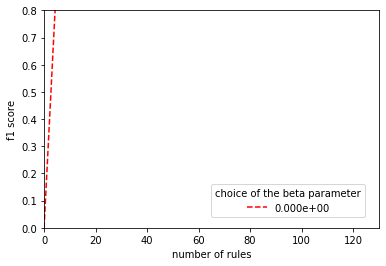

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
# name = "Greys"
# cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
# colors = cmap  # type: list

# # plt.set_prop_cycle(color=colors)

# color_map = get_cmap('viridis')
color_map = get_cmap('binary')
# color_map = get_cmap('winter')


beta_candidates = [i * 0.00001 for i in beta_candidates]
# beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,8,12,15]
# beta_candidates = [0,0.2,0.5,1.5,2,5,8,12,15]
beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,8,10,12,15]
beta_candidates = [0]




beta_candidates = [i * 0.00001 for i in beta_candidates]



for count,b in enumerate(beta_candidates):
#     if count in [3]: 
#         continue
    plot_use_x = []
    plot_use_y = []
#     for i in range(len(lambda_candidates)):

    for i in range(len (results[b] )):
        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][i]
        plot_use_x.append(num)
#         plot_use_y.append(acc_score)
        plot_use_y.append(f1_score)
        

    tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
    tmp = list( filter(lambda x: x[0]>=5,tmp) )
    tmp.append((1000,0.80) ) 
    tmp.append((0,0) ) 
    tmp = sorted(tmp,key=lambda x:x[0])
    X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
    y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)

#     clf = GaussianProcessRegressor()
#     clf.fit(X, y) 
#     x_virtul = [ 0.1 * i for i in range(50)]
#     x_for_predict = np.asarray(x_virtul) .reshape(-1, 1)
#     plt.plot(x_virtul,clf.predict(x_for_predict).reshape(-1),color=color_map(  math.sqrt(b*1000)  )  )
#     plt.plot(X,y  )
    if count == 0:
        plt.plot(X,y,'r--')
    else:
        plt.plot(X,y,color=color_map(  math.sqrt(b*5000)+0.1 )  )

    
plt.legend( [format(b, '.3e') for b in beta_candidates],loc=(0.5,0.05),title="choice of the beta parameter")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend([str(b) for b in beta_candidates], loc=5)
plt.xlim([0,130])
plt.ylim([0,0.8])
plt.ylabel('f1 score')
plt.xlabel('number of rules')
plt.show()

In [32]:
import pickle

new_results = {}
for b in results:
    new_results[b] = []
    for i in results[b]:
        (lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,exs) ) = i
        new_results[b].append( (lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance ) )  )

filehandler = open("without-distance.results","wb")
pickle.dump(new_results,filehandler)
filehandler.close()

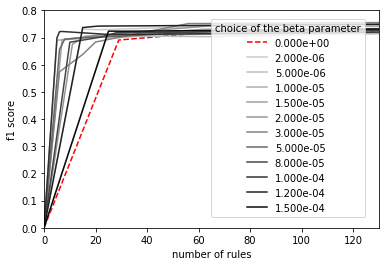

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
# name = "Greys"
# cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
# colors = cmap  # type: list

# # plt.set_prop_cycle(color=colors)

# color_map = get_cmap('viridis')
color_map = get_cmap('binary')
# color_map = get_cmap('winter')


beta_candidates = [i * 0.00001 for i in beta_candidates]
# beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,8,12,15]
# beta_candidates = [0,0.2,0.5,1.5,2,5,8,12,15]
beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,8,10,12,15]


beta_candidates = [i * 0.00001 for i in beta_candidates]



for count,b in enumerate(beta_candidates):
#     if count in [3]: 
#         continue
    plot_use_x = []
    plot_use_y = []
    for i in range(len(lambda_candidates)):
        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance) = new_results[b][i]
        plot_use_x.append(num)
#         plot_use_y.append(acc_score)
        plot_use_y.append(f1_score)
        

    tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
    tmp = list( filter(lambda x: x[0]>=5,tmp) )
    tmp.append((1000,0.80) ) 
    tmp.append((0,0) ) 
    tmp = sorted(tmp,key=lambda x:x[0])
    X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
    y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)

#     clf = GaussianProcessRegressor()
#     clf.fit(X, y) 
#     x_virtul = [ 0.1 * i for i in range(50)]
#     x_for_predict = np.asarray(x_virtul) .reshape(-1, 1)
#     plt.plot(x_virtul,clf.predict(x_for_predict).reshape(-1),color=color_map(  math.sqrt(b*1000)  )  )
#     plt.plot(X,y  )
    if count == 0:
        plt.plot(X,y,'r--')
    else:
        plt.plot(X,y,color=color_map(  math.sqrt(b*5000)+0.1 )  )

    
plt.legend( [format(b, '.3e') for b in beta_candidates],loc=(0.5,0.05),title="choice of the beta parameter")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend([str(b) for b in beta_candidates], loc=5)
plt.xlim([0,130])
plt.ylim([0,0.8])
plt.ylabel('f1 score')
plt.xlabel('number of rules')
plt.show()

# Test active query with first sample a large dataset.


Mainly we vary the sampling rate


In [11]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2


from utils import uniform_enlarge_dataset,estimated_enlarge_dataset


from approach import explain_tabular
from utils import ruleset_predict
from copy import deepcopy


lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.00015,0.0002,0.0003,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]


sampling_rate_candidates = [0,0.5,1,1.5,2]


sampling_results={}
sampling_results["uniform"]={}
sampling_results["estimated"]={}

for rate in sampling_rate_candidates:
    sampling_results["uniform"][rate] = []
    sampling_results["estimated"][rate] = []


for rate in tqdm_notebook(sampling_rate_candidates): 
    
    for mode in ["uniform","estimated"]:
        if mode == "uniform":
            print("uniform sampling")
            new_predicted_data_table = uniform_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
        elif mode == "estimated":
            print("estimated sampling")
            new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
        lambda_parameter = 0.0001
        print(new_predicted_data_table.X.shape)
        explanations,ADS = explain_tabular(new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed,beta=0,lambda_parameter=lambda_parameter)
        for lambda_parameter in  lambda_candidates:
            explanations = ADS.output_the_best(lambda_parameter)
            our_prediction = ruleset_predict(explanations,test_data_table.X)
            f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
            acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
            rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
            pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
            num = len(explanations)
            num_of_instance = rate * predicted_data_table.X.shape[0]
            sampling_results[mode][rate].append( (lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,deepcopy(explanations) )  ) )
            print("parameter: ",mode,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)
  


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


uniform sampling
(43957, 12)
init transformer okay!



KeyboardInterrupt: 

In [ ]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2

import Orange
disc = Orange.preprocess.Discretize()
disc.method = Orange.preprocess.discretize.EntropyMDL()
disc_predicted_test_data_table = disc(predicted_test_data_table)


disc = Orange.preprocess.Discretize()
disc.method = Orange.preprocess.discretize.EntropyMDL()

disc_predicted_data_table = disc(predicted_data_table)
# disc_predicted_test_data_table = disc(predicted_test_data_table)
disc_predicted_test_data_table = Orange.data.Table.from_table(disc_predicted_data_table.domain, predicted_test_data_table)


from utils import uniform_enlarge_dataset,estimated_enlarge_dataset



from competition_methods_explanation.passive_methods.brl import explain_tabular


from utils import ruleset_predict
from copy import deepcopy
import sklearn


sampling_rate_candidates = [0,0.5,1,1.5,2]


sbrl_results={}
sbrl_results["uniform"]=[]
sbrl_results["estimated"]=[]

print("start the experiment of SBRL")

for rate in tqdm_notebook(sampling_rate_candidates): 
    lambda_parameter = 0.0001
    for mode in ["uniform","estimated"]:
        if mode == "uniform":
            new_predicted_data_table = uniform_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
        elif mode == "estimated":
            new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
#         print(new_predicted_data_table.X.shape)
        
        disc_new_predicted_data_table =  Orange.data.Table.from_table(disc_predicted_data_table.domain, new_predicted_data_table)
        sbrl = explain_tabular(disc_new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed)

        sbrl_prediction = sbrl.predict( (disc_predicted_test_data_table.X).astype(int)  )

        our_prediction = ruleset_predict(explanations,test_data_table.X)
        f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, sbrl_prediction)
        acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, sbrl_prediction)
        rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, sbrl_prediction)
        pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, sbrl_prediction)
        num = sbrl.n_rules
        num_of_instance = rate * predicted_data_table.X.shape[0]
        sbrl_results[mode].append( (0,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,deepcopy(explanations) )  ) )
        print("parameter: ",mode,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)
  

# it seems that the pysbrl does not handle randomness very seriously. So here we force the experiment (with sampling rate ==0) to have the same value
sbrl_results["uniform"][0] = sbrl_results["estimated"][0]

0.0 0.0 0.6813186813186812
0.07138794731214596 1e-05 0.69118442401298
0.5188707145619583 5e-05 0.6939443535188217
0.9525672816616239 8e-05 0.7014523937600861
1.793479991810178 0.00015000000000000001 0.7234949387320192


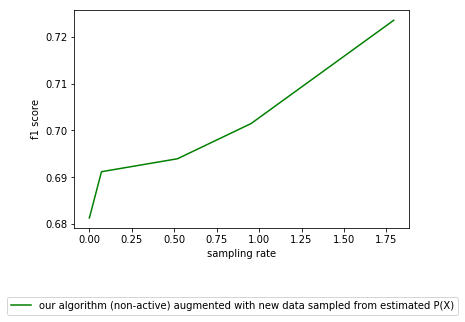

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,4))
# sampling_rate_candidates = [0,0.5,1,1.5] 
# # as in our active methods, the largest beta produces a new sampling rate around 1.2, not very close to 2, so we only use [0,0.5,1,1.5]
# lambda_idx = lambda_candidates.index(0.0005)
# # for count,mode in enumerate(["estimated"]):
# for count,mode in enumerate(["uniform","estimated"]):
#     plot_use_x = []
#     plot_use_y = []
#     for i in sampling_rate_candidates:

# #         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(sampling_results[mode][i],key=lambda x:x[1][1])
#         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = sampling_results[mode][i][lambda_idx]
        
#         plot_use_x.append(i)
#         plot_use_y.append(f1_score)
        
#     tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
#     tmp = sorted(tmp,key=lambda x:x[0])
#     X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
#     y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
#     if mode == "uniform":
#         plt.plot(X,y,'r--')
#     else:
#         plt.plot(X,y,'r')

# # for count,mode in enumerate(["estimated"]):
# for count,mode in enumerate(["uniform","estimated"]):
#     plot_use_x = []
#     plot_use_y = []
#     for c,i in enumerate(sampling_rate_candidates):

# #         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(sampling_results[mode][i],key=lambda x:x[1][1])
#         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = sbrl_results[mode][c]
        
#         plot_use_x.append(i)
#         plot_use_y.append(f1_score)
        
#     tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
#     tmp = sorted(tmp,key=lambda x:x[0])
#     X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
#     y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)

#     if mode == "uniform":
#         plt.plot(X,y,'b--')
#     else:
#         plt.plot(X,y,'b')
        
plot_use_x = []
plot_use_y = []
lambda_idx = lambda_candidates.index(0.0005)

beta_candidates = [0,1,5,8,15] # we choose these betas because the rate of new data samples is similar to the intervals in the sampling rate [0,0.5,1,1.5]
beta_candidates = [i * 0.00001 for i in beta_candidates]
for count,b in enumerate(beta_candidates):
#     lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(results[b],key =lambda x:x[1][1])
    lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][lambda_idx]
    print(1.0* num_of_instance / predicted_data_table.X.shape[0],b,f1_score )
    plot_use_x.append(1.0* num_of_instance / predicted_data_table.X.shape[0])
    plot_use_y.append(f1_score)
        
tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
tmp = sorted(tmp,key=lambda x:x[0])
X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
plt.plot(X,y,'g'  )

plt.legend([
#             "our algorithm (non-active) augmented with new data sampled uniformly",
            "our algorithm (non-active) augmented with new data sampled from estimated P(X)",
#             "SBRL augmented with new data sampled uniformly" , 
            "SBRL augmented with new data sampled from estimated P(X) (Ming et al, 2018)",
            "our Algorithm (active)"],loc=(-0.2,-0.40))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend([str(b) for b in beta_candidates], loc=5)
# plt.xlim([3,10])
# plt.ylim([0.8,1])
plt.ylabel('f1 score')
plt.xlabel('sampling rate')
plt.show()

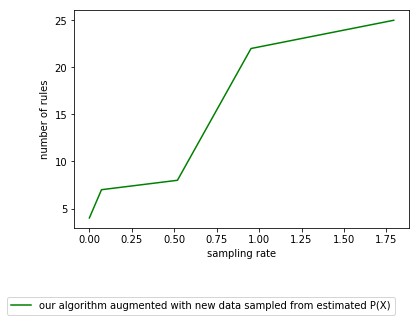

In [20]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor

plt.figure(figsize=(6,4))
# name = "Greys"
# cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
# colors = cmap  # type: list

# # plt.set_prop_cycle(color=colors)

# color_map = get_cmap('viridis')
color_map = get_cmap('binary')



# sampling_rate_candidates = [0,0.5,1,1.5]

# lambda_idx = lambda_candidates.index(0.0005)
# for count,mode in enumerate(["estimated"]):
#     plot_use_x = []
#     plot_use_y = []
#     for i in sampling_rate_candidates:

# #         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(sampling_results[mode][i],key=lambda x:x[1][5])
# #         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = sampling_results[mode][i][8]
#         if mode == 'uniform':
#             lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = sampling_results[mode][i][lambda_idx]
#         else:
#             lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = sampling_results[mode][i][lambda_idx]
        
#         plot_use_x.append(i)
#         plot_use_y.append(num)
        
#     tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
#     tmp = sorted(tmp,key=lambda x:x[0])
#     X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
#     y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)

#     if mode == "uniform":
#         plt.plot(X,y,'r--')
#     else:
#         plt.plot(X,y,'r')

# for count,mode in enumerate(["estimated"]):
#     plot_use_x = []
#     plot_use_y = []
#     for c,i in enumerate(sampling_rate_candidates):

# #         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(sampling_results[mode][i],key=lambda x:x[1][1])
#         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = sbrl_results[mode][c]
        
#         plot_use_x.append(i)
#         plot_use_y.append(num)
        
#     tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
#     tmp = sorted(tmp,key=lambda x:x[0])
#     X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
#     y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)

#     if mode == "uniform":
#         plt.plot(X,y,'b--')
#     else:
#         plt.plot(X,y,'b')

plot_use_x = []
plot_use_y = []
lambda_idx = lambda_candidates.index(0.0005)
# beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,8,10,12,15]
beta_candidates = [0,1,5,8,15]
# beta_candidates = [0,1,5,15]


beta_candidates = [i * 0.00001 for i in beta_candidates]
for count,b in enumerate(beta_candidates):
#     lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(results[b],key =lambda x:x[1][5])
    lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][lambda_idx]
    plot_use_x.append(1.0* num_of_instance / predicted_data_table.X.shape[0])
    plot_use_y.append(num)
        
tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
tmp = sorted(tmp,key=lambda x:x[0])
X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)

plt.plot(X,y,'g'  )

plt.legend([
#             "our algorithm augmented with new data sampled uniformly",
            "our algorithm augmented with new data sampled from estimated P(X)",
#             "SBRL augmented with new data sampled uniformly" , 
            "SBRL augmented with new data sampled from estimated P(X) (Ming et al, 2018)",
            "our Algorithm (active)"],loc=(-0.2,-0.4))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend([str(b) for b in beta_candidates], loc=5)
# plt.xlim([3,10])
# plt.ylim([0.8,1])
plt.ylabel('number of rules')
plt.xlabel('sampling rate')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor


color_map = get_cmap('binary')


sampling_rate_candidates = [0,0.5,1,1.5,2]

for mode in ["uniform","estimated"]:
    plot_use_x = []
    plot_use_y = []
    for count,rate in enumerate(sampling_rate_candidates):
         _,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,_ ) = sbrl_results[mode][count];plot_use_x.append(rate);plot_use_y.append(acc_score)
        
        
    plt.plot(plot_use_x,plot_use_y )
    
plt.ylabel('f1 score')
plt.xlabel('sampling rate')
plt.show()

In [ ]:
1 / 0

In [ ]:
import dill
dill.dump_session('notebook_session_july_31.db')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
# name = "Greys"
# cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
# colors = cmap  # type: list

# # plt.set_prop_cycle(color=colors)

# color_map = get_cmap('viridis')
color_map = get_cmap('binary')



# lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]


# beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,10]
# beta_candidates = [i * 0.00001 for i in beta_candidates]

for b in beta_candidates:
    plot_use_x = []
    plot_use_y = []
    for i in range(len(lambda_candidates)):
        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][i]
        plot_use_x.append(lambda_parameter)
        plot_use_y.append(f1_score)
    # for x,y in zip(plot_use_x,plot_use_y):
    #     print(x,y)
   
    plt.plot(plot_use_x,plot_use_y,color=color_map(  math.sqrt(b*5000)  ))
plt.legend([str(b) for b in beta_candidates], loc=(1.04,0))

plt.ylabel('f1 score')
plt.xlabel('lambda')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

color_map = get_cmap('binary')
for b in beta_candidates:
    plot_use_x = []
    plot_use_y = []
    for i in range(len(lambda_candidates)):
        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][i]
        plot_use_x.append(lambda_parameter)
        plot_use_y.append(num)
    # for x,y in zip(plot_use_x,plot_use_y):
    #     print(x,y)
    plt.plot(plot_use_x,plot_use_y,color=color_map(  math.sqrt(b*1000)  ))
plt.legend([str(b) for b in beta_candidates], loc=(1.04,0))

plt.ylabel('num of rules')
plt.xlabel('lambda')
plt.xlim([0,0.01])
plt.show()

In [ ]:
score_list=[]
for i,l in enumerate(lambda_candidates):
    for b in beta_candidates:

        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][i]
        score_list.append(  (l,b,num,f1_score,acc_score,rec_score,pre_score) )

score_list = sorted(score_list,reverse=True,key=lambda x:x[4])
print(score_list[0])
l,b,num,f1_score,acc_score,rec_score,pre_score = score_list[0]
print("the best lambda: ",l)
print("the best beta:",b)
print("f1:",f1_score," acc: ",acc_score," recall: ",rec_score," precision: ",pre_score)

In [ ]:
for b in results:
    print(b)